In [387]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
%matplotlib inline
sns.set_style("darkgrid")

In [388]:
netflix_df = pd.read_csv("/Users/mac/Downloads/Netflix Userbase.csv")

In [389]:
netflix_df

,User ID,Subscription Type,MonthlyRevenue,JoinDate,LastPayment Date,Country,Age,Gender,Device,PlanDuration
0,1,Basic,10,15/01/2022,10/06/2023,United States,28,Male,Smartphone,1 Month
1,2,Premium,15,05/09/2021,22/06/2023,Canada,35,Female,Tablet,1 Month
2,3,Standard,12,28/02/2023,27/06/2023,United Kingdom,42,Male,Smart TV,1 Month
3,4,Standard,12,10/07/2022,26/06/2023,Australia,51,Female,Laptop,1 Month
4,5,Basic,10,01/05/2023,28/06/2023,Germany,33,Male,Smartphone,1 Month
...,...,...,...,...,...,...,...,...,...,...
2495,2496,Premium,14,25/07/2022,12/07/2023,Spain,28,Female,Smart TV,1 Month
2496,2497,Basic,15,04/08/2022,14/07/2023,Spain,33,Female,Smart TV,1 Month
2497,2498,Standard,12,09/08/2022,15/07/2023,United States,38,Male,Laptop,1 Month
2498,2499,Standard,13,12/08/2022,12/07/2023,Canada,48,Female,Tablet,1 Month


In [390]:
netflix_df.shape

(2500, 10)

In [391]:
netflix_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   User ID            2500 non-null   int64 
 1   Subscription Type  2500 non-null   object
 2   MonthlyRevenue     2500 non-null   int64 
 3   JoinDate           2500 non-null   object
 4   LastPayment Date   2500 non-null   object
 5   Country            2500 non-null   object
 6   Age                2500 non-null   int64 
 7   Gender             2500 non-null   object
 8   Device             2500 non-null   object
 9   PlanDuration       2500 non-null   object
dtypes: int64(3), object(7)
memory usage: 195.4+ KB


In [392]:
netflix_df.nunique()

User ID              2500
Subscription Type       3
MonthlyRevenue          6
JoinDate              300
LastPayment Date       26
Country                10
Age                    26
Gender                  2
Device                  4
PlanDuration            1
dtype: int64

In [393]:
netflix_df.isnull().values.any()

False

In [394]:
netflix_df["Subscription Type"]

0          Basic
1        Premium
2       Standard
3       Standard
4          Basic
          ...   
2495     Premium
2496       Basic
2497    Standard
2498    Standard
2499       Basic
Name: Subscription Type, Length: 2500, dtype: object

In [395]:
netflix_df["Subscription Type"] = netflix_df["Subscription Type"].astype(str)

In [396]:
netflix_df["Subscription Type"].nunique()

3

In [397]:
netflix_df["Subscription Type"].unique()

array(['Basic', 'Premium', 'Standard'], dtype=object)

In [398]:
netflix_df.Gender.nunique()

2

In [399]:
netflix_df.Gender.unique()

array(['Male', 'Female'], dtype=object)

In [400]:
netflix_df.Device.nunique()

4

In [401]:
netflix_df.Device.unique()

array(['Smartphone', 'Tablet', 'Smart TV', 'Laptop'], dtype=object)

In [402]:
netflix_df["JoinDate"] = pd.to_datetime(netflix_df["JoinDate"])

/var/folders/dt/tmc00qr10gv5n95rzcvvhfn00000gn/T/ipykernel_71172/1880259334.py:1: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  netflix_df["JoinDate"] = pd.to_datetime(netflix_df["JoinDate"])


##### how many people joined in 2021

In [403]:
netflix_df["JoinDate"] = netflix_df["JoinDate"].dt.year

In [404]:
year_to_check = 2021
people_joined_in_year = netflix_df[netflix_df["JoinDate"] == year_to_check]

In [405]:
people_joined_in_year

,User ID,Subscription Type,MonthlyRevenue,JoinDate,LastPayment Date,Country,Age,Gender,Device,PlanDuration
1,2,Premium,15,2021,22/06/2023,Canada,35,Female,Tablet,1 Month
6,7,Standard,12,2021,25/06/2023,Brazil,46,Male,Tablet,1 Month
12,13,Standard,12,2021,27/06/2023,United Kingdom,48,Female,Laptop,1 Month
17,18,Standard,12,2021,24/06/2023,Mexico,43,Male,Smartphone,1 Month
22,23,Standard,12,2021,27/06/2023,United Kingdom,49,Female,Smart TV,1 Month
27,28,Standard,12,2021,24/06/2023,Mexico,33,Male,Tablet,1 Month
37,38,Standard,12,2021,24/06/2023,Mexico,32,Male,Smartphone,1 Month
47,48,Standard,12,2021,24/06/2023,Mexico,32,Male,Tablet,1 Month
57,58,Standard,12,2021,24/06/2023,Mexico,34,Male,Smartphone,1 Month
67,68,Standard,12,2021,24/06/2023,Mexico,33,Male,Tablet,1 Month


##### over the years, how many people joined each year?

In [406]:
yearly_counts = netflix_df["JoinDate"].value_counts().sort_index()

In [407]:
yearly_counts

2021      14
2022    2448
2023      38
Name: JoinDate, dtype: int64

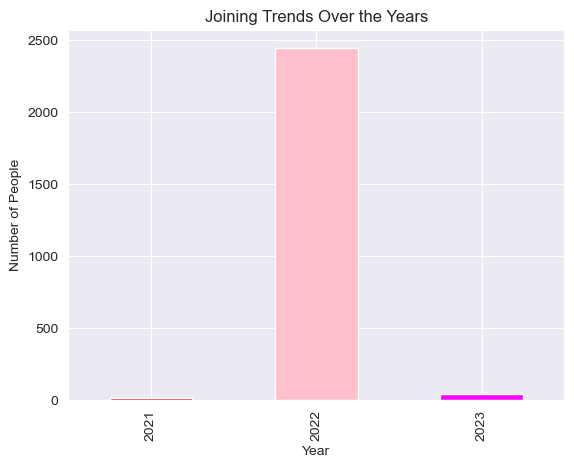

In [408]:
colors = ['red', 'pink', 'magenta']

yearly_counts.plot(kind="bar", color=colors)
plt.title("Joining Trends Over the Years")
plt.xlabel("Year")
plt.ylabel("Number of People")
plt.show()

the highest number of people joined in 2022

##### over the years, what subscription type was subscibed to the most?

In [409]:
subscriptions = netflix_df["Subscription Type"].unique()

In [410]:
subscriptions

array(['Basic', 'Premium', 'Standard'], dtype=object)

In [411]:
netflix_df["JoinDate"].unique()

array([2022, 2021, 2023])

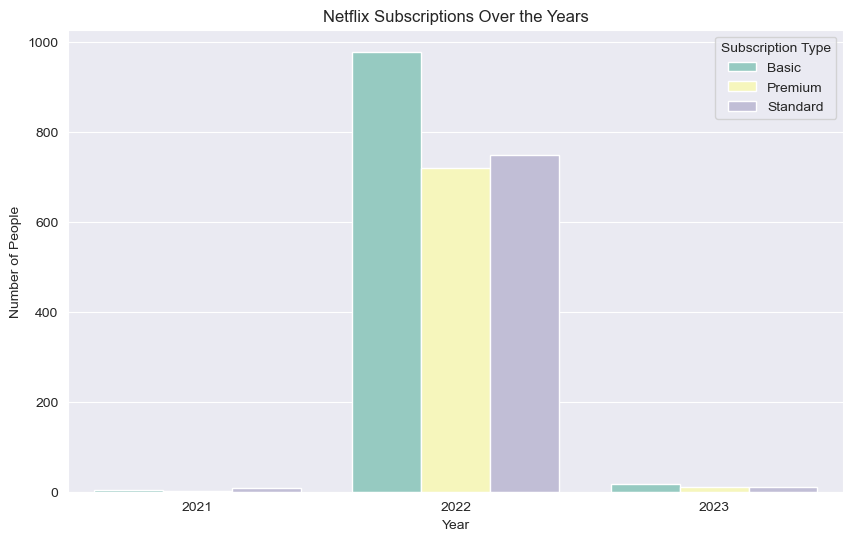

In [412]:
den = netflix_df['JoinDate']


plt.figure(figsize=(10, 6))
sns.countplot(x=den, hue='Subscription Type', data=netflix_df, palette="Set3")
plt.title('Netflix Subscriptions Over the Years')
plt.xlabel('Year')
plt.ylabel('Number of People')
plt.legend(title='Subscription Type')
plt.show()

Basic Subscription was subscirbed to the most

##### Ages of Netflix Subscribers Over Time

/Users/mac/anaconda3/lib/python3.10/site-packages/seaborn/categorical.py:3544: UserWarning: 60.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/mac/anaconda3/lib/python3.10/site-packages/seaborn/categorical.py:3544: UserWarning: 70.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


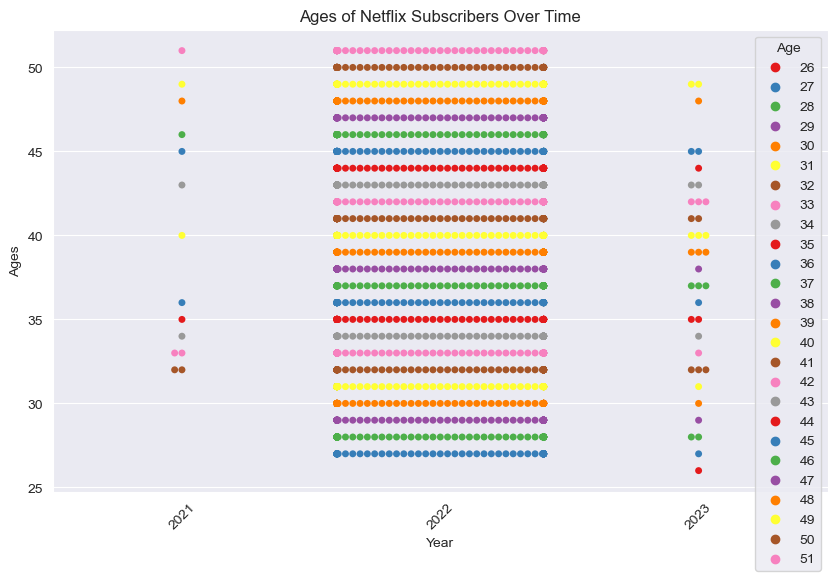

In [423]:
den = netflix_df['JoinDate']


plt.figure(figsize=(10, 6))
sns.swarmplot(x=den, y='Age', data=netflix_df, palette="Set1", hue="Age")
plt.title('Ages of Netflix Subscribers Over Time')
plt.xlabel('Year')
plt.ylabel('Ages')
plt.xticks(rotation=45)
plt.show()

In [424]:
netflix_df

,User ID,Subscription Type,MonthlyRevenue,JoinDate,LastPayment Date,Country,Age,Gender,Device,PlanDuration
0,1,Basic,10,2022,10/06/2023,United States,28,Male,Smartphone,1 Month
1,2,Premium,15,2021,22/06/2023,Canada,35,Female,Tablet,1 Month
2,3,Standard,12,2023,27/06/2023,United Kingdom,42,Male,Smart TV,1 Month
3,4,Standard,12,2022,26/06/2023,Australia,51,Female,Laptop,1 Month
4,5,Basic,10,2023,28/06/2023,Germany,33,Male,Smartphone,1 Month
...,...,...,...,...,...,...,...,...,...,...
2495,2496,Premium,14,2022,12/07/2023,Spain,28,Female,Smart TV,1 Month
2496,2497,Basic,15,2022,14/07/2023,Spain,33,Female,Smart TV,1 Month
2497,2498,Standard,12,2022,15/07/2023,United States,38,Male,Laptop,1 Month
2498,2499,Standard,13,2022,12/07/2023,Canada,48,Female,Tablet,1 Month


##### what countries generate the most revenue?

In [452]:
nut = netflix_df["MonthlyRevenue"].sum()

31271

In [436]:
country_revenue = netflix_df.sort_values("MonthlyRevenue", ascending=False).head(10)
country_revenue

,User ID,Subscription Type,MonthlyRevenue,JoinDate,LastPayment Date,Country,Age,Gender,Device,PlanDuration
2499,2500,Basic,15,2022,12/07/2023,United States,35,Female,Smart TV,1 Month
2334,2335,Premium,15,2022,10/07/2023,United States,45,Male,Laptop,1 Month
2425,2426,Premium,15,2022,12/07/2023,United States,51,Male,Smartphone,1 Month
2426,2427,Basic,15,2022,14/07/2023,Canada,28,Female,Smartphone,1 Month
379,380,Basic,15,2022,27/06/2023,Italy,27,Female,Smart TV,1 Month
1648,1649,Premium,15,2022,05/07/2023,Australia,30,Male,Tablet,1 Month
1647,1648,Standard,15,2022,06/07/2023,United Kingdom,41,Female,Smartphone,1 Month
1645,1646,Basic,15,2022,09/07/2023,United States,46,Female,Tablet,1 Month
954,955,Basic,15,2022,02/07/2023,United States,36,Female,Laptop,1 Month
959,960,Basic,15,2022,30/06/2023,Germany,46,Female,Tablet,1 Month


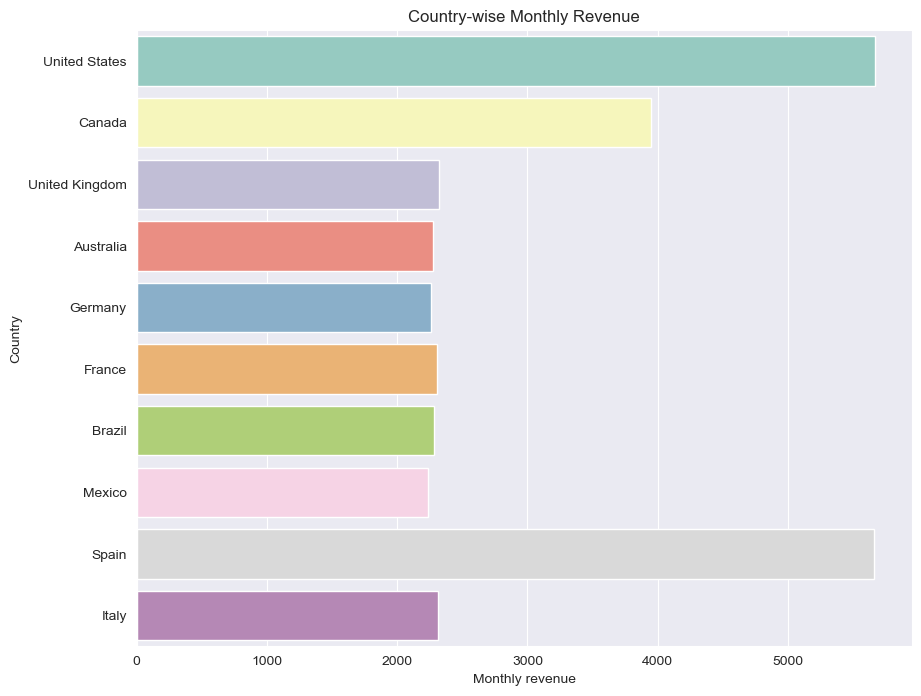

In [451]:
plt.figure(figsize=(10, 8))
sns.barplot(x='MonthlyRevenue', y='Country', errorbar=None, estimator="sum", data=netflix_df, palette="Set3")
plt.title('Country-wise Monthly Revenue')
plt.xlabel('Monthly revenue')
plt.ylabel('Country')
plt.show()

##### what devices are used the most by netflix subscibers?

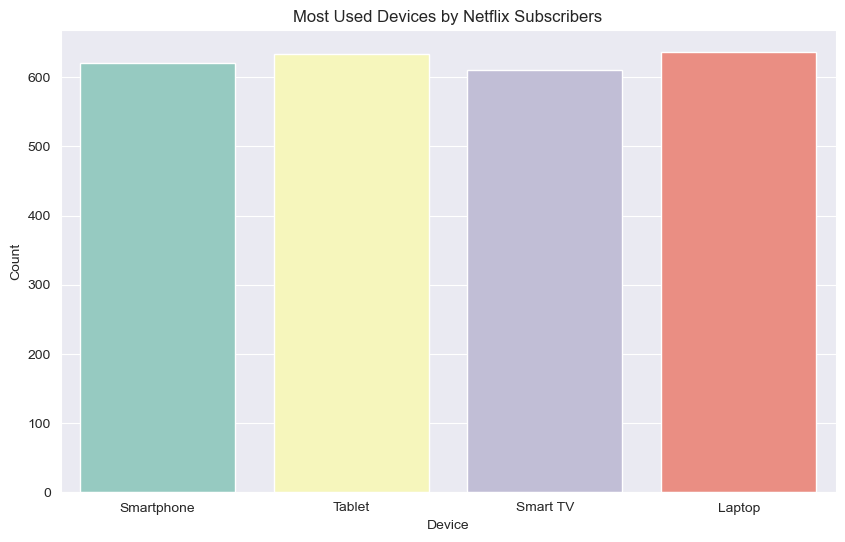

In [439]:
plt.figure(figsize=(10, 6))
sns.countplot(x="Device", data=netflix_df, palette="Set3")
plt.title('Most Used Devices by Netflix Subscribers')
plt.xlabel('Device')
plt.ylabel('Count')
plt.show()

##### in male and female, what gender is has the highest amount of subscription over the years

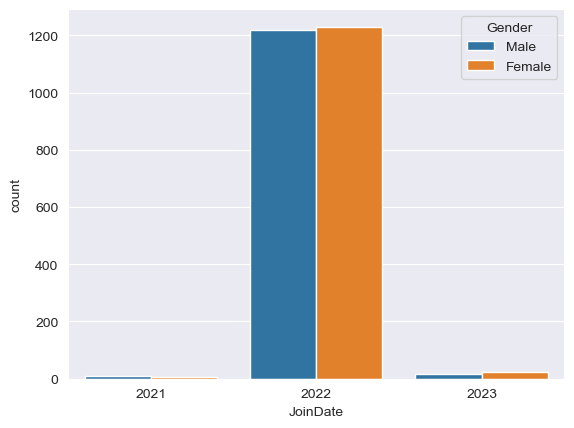

In [446]:
sns.countplot(x="JoinDate", hue="Gender", data=netflix_df);

##### in male and female, what gender is has the highest amount of subscription overall

In [443]:
gender_counts = netflix_df["Gender"].value_counts()
gender_counts

Female    1257
Male      1243
Name: Gender, dtype: int64

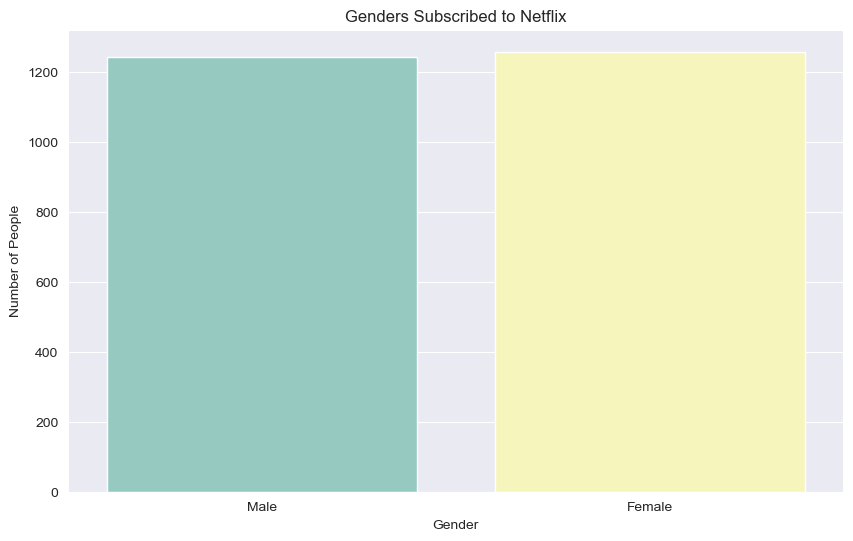

In [449]:
plt.figure(figsize=(10, 6))
sns.countplot(x="Gender", data=netflix_df, palette="Set3")
plt.title('Genders Subscribed to Netflix')
plt.xlabel('Gender')
plt.ylabel('Number of People')
plt.show()